<h1>Polynomial Interpolation</h1>

<p>The problem: we know a function's value at some points, $(x_0, y_0)$, $(x_1, y_1), \dots, (x_n, y_n)$. How can we approximate that function?</p>

<p>There are many functions that can go through a sequence of points, the problem is not unique in general.</p>

<p>However Theorem 1 on polynomial interpolation (p309)</p>

<blockquote>
<p>There is a <em>unique</em> polynomial of degree $n$ going through the $n+1$ points. (We assume the $x_i$ are real.)</p>
</blockquote>

<h2>Uniqueness</h2>

<p>Well, suppose there are two such polynomials $p(x)$ and $q(x)$. Then we have $h(x) = p(x) - q(x)$. It has degree at most $n$, so there are no more than $n$ roots. But $h(x_i) = p(x_i) - q(x_i) = y_i - y_i = 0$. So there are $n+1$ roots, hence a contradiction.</p>

<h2>Existence</h2>

<p>For existence, we can use induction.</p>

<p>For $n=0$ we just have a constant $p_0(x) = y_1$ and then $p_0(x_1) = y_1$ too.</p>

<p>For $n=1$: we have two points and we can make the line between them. The point slope form is helpful, it would look like:</p>


$$
p_1(x) = x_0 + \frac{y_1 - y_0}{x_1 - x_0} (x - x_0).
$$


<hr />

<p>Assuming that the statement is true for $k$, can we show it is true for $k+1$.</p>

<p>First from $p_{k-1}$ with degree $\leq k-1$ from the first $k-1$ points. Then we write the following formally:</p>


$$
p_k = p_{k-1}(x) + c(x-x_0)(x-x_1)\cdots (x - x_{k-1})
$$


<p>For some $c$ we will show that this polynomial has degree $\leq k$ and $p_k(x_i) =y_i$ for all $i$ between $0$ and $k$.</p>

<p>The term added is an $k$th degree polynomial. So $p_k$ is a polynomial of degree $\leq k$ and degree of $p_{k-1}$.</p>

<p>The term added is $0$ at each of $x_0, \dots, x_{k-1}$, so for these values</p>


$$
p_k(x_i) = p_{k-1}(x_i) + 0 = y_i.
$$


<p>Finally, $p_k(x_n) = p_{k-1}(x_k) + c \prod_{i=0}^{k-1}(x_k - x_i)$</p>

<p>Setting this to $y_k$ gives:</p>


$$
y_k=  p_{k-1}(x_k) + c \prod_{i=0}^{k-1}(x_k - x_i)
$$


<p>Or</p>


$$
c = \frac{y_k - p_{k-1}(x_k)}{\prod_{i=0}^{k-1}(x_k - x_i)}.
$$


<p>The divisor is clearly not $0$, so this defines $c$ and we have found $p_k$.</p>

<h3>The form of the polynomial</h3>

<p>We have just seen that</p>


$$
p_k(x) = c_0 + c_1(x-x_0) + c_2(x-x_0)(x-x_1) + \cdots + c_k(x-x_0)\cdots(x-x_{k-1}) =
\sum_{i=0}^{k} c_i \prod_{j=0}^{i-1} (x - x_j).
$$


<p>where</p>


$$
c_k = \frac{y_k - p_{k-1}(x_k)}{\prod_{i=0}^{k-1}(x_k - x_i)}.
$$


<h3>The Lagrange form of the polynomial:</h3>

<p>There are other means to express this polynomial, that are a bit clearer.</p>

<p>The Lagrange form of the interpolating polynomial uses the $y_i$ as coefficients:</p>


$$
L(x) = \sum y_i \cdot l_i(x),
$$


<p>Where</p>


$$
l_i(x) = \prod_{m \neq i} \frac{x - x_m}{x_i - x_m}.
$$


<p>Why this? We want a polynomial that a) takes a value of $0$ at $x_j$ ($j \neq i$) and $1$ at $x_i$. Clearly a) is satisfied by $c(x - x_0) \cdot (x - x_k)$ <strong>skipping</strong> $x_i$. Putting in $x_i$, then says $c$ should be the reciprocal of $(x_i-x_0) \cdots (x_i - x_k)$ <strong>skipping</strong> $x_i-x_i$.</p>

<p>These are polynomials of degree $n$. using the delta function, these satisfy:</p>


$$
l_i(x_j) = \delta_{ij}.
$$


<p>So $L(x_i) = \sum_j y_i \delta_{ij} = y_i \cdot 1 = y_i$, as expected. So $L(x)$ is a polyonmial of degree at most $n$ and by uniqueness is the <em>interpolating</em> polynomial.</p>

<h3>Alternate derivations</h3>

<p>Suppose we have a polynomial $p_k(x) = a_0 + a_1x + a_2x^2 + \cdots a_k x^k$ which satisfies $p_k(x_i) = y_i$. Then this leads to a system of equations:</p>


$$
\begin{array}{cc}
&a_0 \cdot 1 + a_1 x_0 + a_2 x_0^2 + \cdots + a_k x_0^k = y_0\\
&a_0 \cdot 1 + a_1 x_1 + a_2 x_1^2 + \cdots + a_k x_1^k = y_1\\
&\cdots\\
&a_0 \cdot 1 + a_1 x_k + a_2 x_k^2 + \cdots + a_k x_k^k = y_k
\end{array}
$$


<p>This is a <em>linear</em> system of $k+1$ equations in $k+1$ unknowns $a_0, a_1, \dots, a_k$. If the coefficient matrix is nonsingular, it has solution $A^{-1}y$.</p>

<p>For example</p>

In [1]:
using SymPy
k=2
xs = Sym["x$i" for i in 0:k]
ys = Sym["y$i" for i in 0:k]
as = Sym["a$i" for i in 0:k]

x = symbols("x")
p = sum([as[i+1] * x^i for i in 0:k])

eqs = Sym[subs(p, x, u) - v for (u,v) in zip(xs, ys)]

<p>We can solve these (they are linear after all):</p>

In [1]:
us = solve(eqs, as)

<p>But it isn't pretty and doesn't get prettier with factoring</p>

In [1]:
Dict(k=>factor(v) for (k,v) in us)

<h3>Vandermonde matrix</h3>

<p>A <a href="https://en.wikipedia.org/wiki/Vandermonde_matrix">Vandermonde</a> matrix is a matrix with a geometric progression in each row. For example, the matrix:</p>


$$
\begin{bmatrix}
1 & x_0 & x_0^2  & \cdots & x_0^k\\
1 & x_1 & x_1^2  & \cdots & x_1^k\\
  &     & \cdots &        & \\
1 & x_k & x_k^2 & \cdots & x_k^k
\end{bmatrix}
$$


<p>Calling this $V$, then our set of equations is represented by $Va = y$. The determinant of $V$, when square, is known: $|V| = \prod_{i < j} (x_j - x_i)$.</p>

<p>That this is non-zero says that there will be a unique solution $a$ for a given $y$ – an alternate proof of the t</p>

<h3>Error</h3>

<p>Consider $f(x) = \sin(x)$ on $[0, \pi/2]$. Then the interpolation between 2 points is just a secant line:</p>

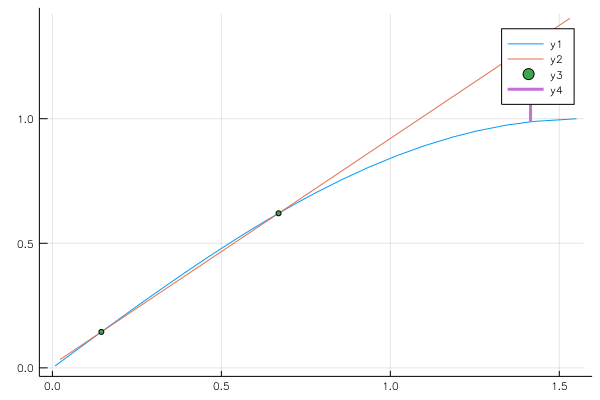

In [1]:
f(x) = sin(x)
a,b = pi/2 * sort(rand(2))
g(x) = f(a) + (f(b)-f(a))/(b-a)*(x-a)
plot(f, 0, pi/2)
plot!(g)
scatter!([a,b], f.([a,b]), markersize=3)

u = pi/2 * rand()
plot!([u,u], sort([f(u), g(u)]), linewidth=3)

<p>Question, how big is the <em>difference</em> between the two?</p>

<p>Theorem 2 p315: Error in the polynomial interpolation</p>

<blockquote>
<p>Let $f$ be continuous of degreen $n+1$ over $[a,b]$ and $p$ be a polynomial interpolating $p$ at $n+1$ distinct points. Then for each $x$ there exists $\xi$ with 
$$ f(x) - p(x) = \frac{1}{(n+1)!} f^{(n+1)}(\xi) \prod_{i=0}^n (x - x_i). $$
</p>
</blockquote>

<p>PF: Let $x$ <em>not</em> be a node (otherwise it is clearly true). Then define $w$ and $\lambda$ by:</p>


$$
w(t) = \prod_0^n (t - x_i), \quad \phi(t) = f(t)  - p(t) - \lambda
w(t), \quad \phi(x) = 0
$$


<p>Then $\lambda = (f(x) - p(x))/w(x)$. $\phi$ vanishes at $x, x_0, \dots x_n$, so by Rolle's theorem there are $n+1$ distinct zeros of $\phi'$, $n$ distinct zeros of $\phi''$, $n-1$ distinct zeros of $\phi'''$ ... So $\phi^({n+1})$ has at least one zero, $\xi$ in $(a,b)$.</p>

<p>But $\phi^{(n_1)} = f^{(n+1)} - p^{(n+1)} - \lambda w^{(n+1)} = f^{(n+1)} - (n+1)! \lambda. At $\xi$ this becomes:</p>


$$
0 = \phi^{(n_1)}(\xi) = f^{(n+1)}(\xi) - (n+1)! \lambda =
f^{(n+1)}(\xi) - (n+1)! (f(x) - p(x))/w(x).
$$


<h4>Example</h4>

<p>For the function $f(x) = \cos(x)$ over the interval $[0, \pi/2]$ if $k=4+1$ points are chosen and a polynomial interpolates, then the difference is</p>


$$
\cos(x) - p(x) = \frac{1}{120} f^{(5)}(\xi) \prod_0^4(x-x_i)
$$


<p>This can be as large (in absolute value) as:</p>


$$
|\cos(x) - p(x)| \leq \frac{1}{120} \cdot 1 \cdot  (\pi/2)^5 = 0.07969262624616703
$$


<p>This is a worst case. We can graph to see the difference.</p>

In [1]:
function dd(f,xs)
  if length(xs) == 1
     f(xs[1])
  else
	 (dd(f,xs[2:end]) - dd(f, xs[1:end-1])) / (maximum(xs) - minimum(xs))
	 end
end

dd (generic function with 1 method)

In [1]:
n = 4
f(x) = cos(x)
a,b = 0, pi/2
xs = a + sort(rand(n+1)) * b

## prod_j=0^(k-1)(x-x_j)
prodk(x, k, xs) = prod([ x - xs[j+1] for j in 0:(k-1)])
## sum _(k=0)^n f[x_0, \dots x_k] prod_j=0^(k-1)(x-x_j)
p4(x) = f(xs[1]) + sum( [ dd(f, xs[1:(k+1)]) * prodk(x, k, xs) for k in 1:n])

p4 (generic function with 1 method)

<p>To visualize we try:</p>

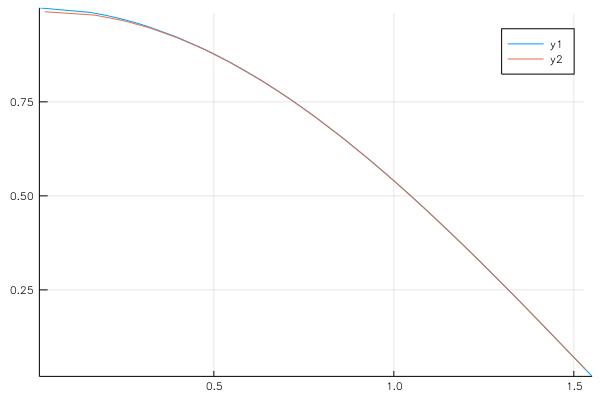

In [1]:
using Plots
plot(f, 0, pi/2)
plot!(p4)

<p>Not too illuminating, so we try this:</p>

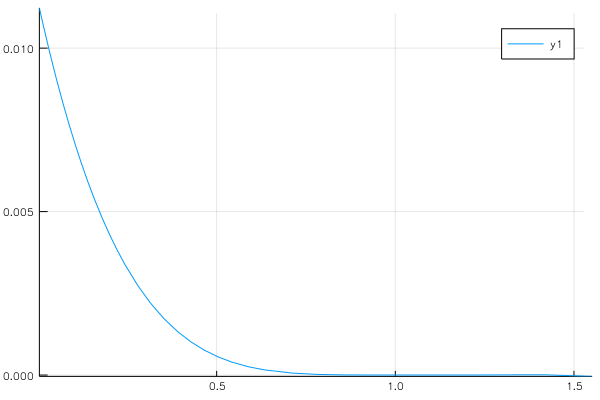

In [1]:
plot(x -> f(x) - p4(x), 0, pi/2)

<p>So the actual difference is at most $0.002$, which is nowhere near as large as is possible ($0.079$).</p>

<h2>The errors can grow!</h2>

<p>The bound on the error depends on the derivatives of the function. For some functions, these may get big, so it isn't the case that we definitely know that $\| f -p_n \|_\infty \rightarrow 0$.</p>

<blockquote>
<p>p319: "The surprising state of affairs is that for most continuous functions the quantity will not converge to 0"</p>
</blockquote>

<p>Example, (Runge 1901). Let $f(x) = 1/(x^2+1)$ and $[a,b] = [-5,5]$. We will use <em>evenly</em> spaced points and have a look:</p>

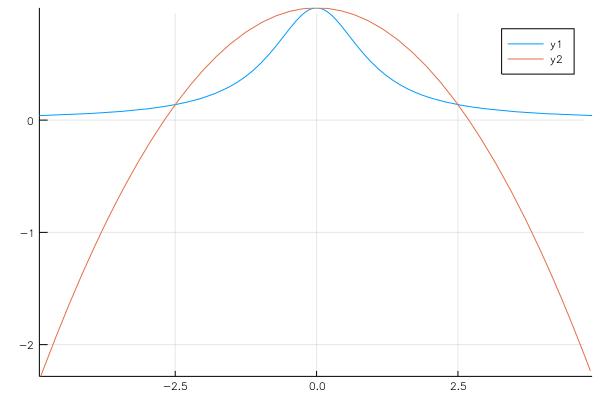

In [1]:
f(x) = 1/(x^2 + 1)
a,b = -5, 5


function show_n(n)
  xs = linspace(a, b, n + 1 + 2)[2:end-1]

  ip(x)  = f(xs[1]) + sum( [ dd(f, xs[1:(k+1)]) * prodk(x, k, xs) for k in 1:n])
  plot(f, a, b)
  plot!(ip)
end

show_n(2)

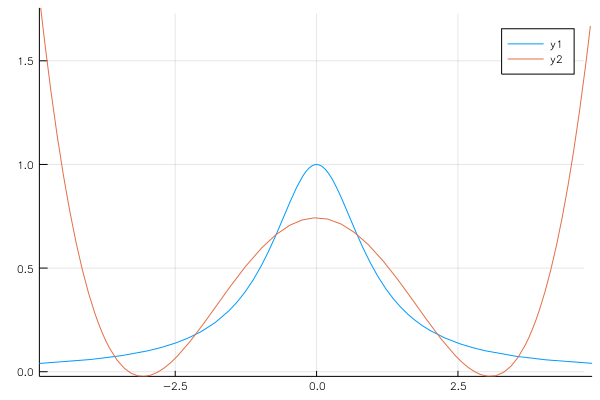

In [1]:
show_n(5)

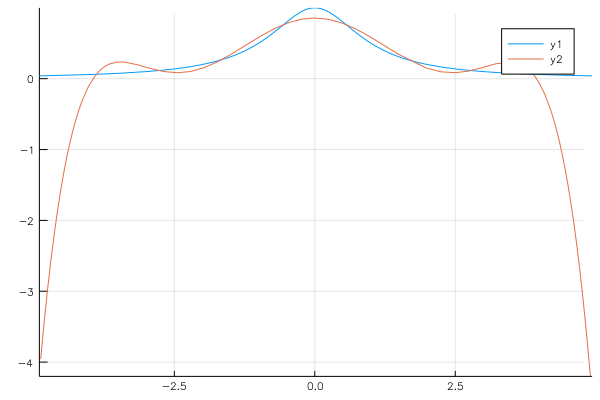

In [1]:
show_n(7)

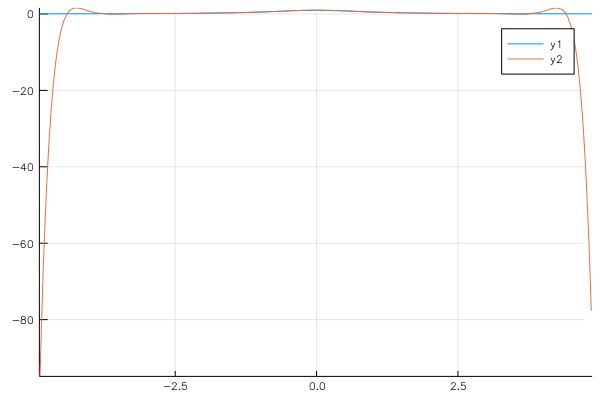

In [1]:
show_n(15)

<p>(There are better functions to approximate over an entire interval.)</p>

<h3>Divided differences 6.2</h3>

<p>Suppose we have $y_i = f(x_i)$ and we want to find the interpolating polynomial. We can express this in terms of $f$.</p>

<p>Following the book (p328), we define</p>


$$
q_0(x) = 1, \quad q_1(x) = (x - x_0), \quad q_2(x) = (x - x_0)(x-x_1),
...
$$


<p>Then we have seen for some $c_k$ that $p(x) = \sum_{j=0}^n c_j q_j(x)$</p>

<p>For $n=2$, from $p(x_i) = f(x_i)$, we see that the $c_i$s satisfy $Lc=f$ where $c = [c_0, c_1, c_2]$ and $f=[f(x_0), f(x_1), f(x_2)$ and $L$ is lower triangular</p>


$$
\begin{bmatrix}
1 & 0 & 0 \\
1 & (x_1-x_0) & 0 \\
1 & (x_2-x_0) & (x_2-x_0)\cdot (x_2 - x_1)
\end{bmatrix}.
$$


<p>We see that $c_m$ depends on $f(x_0), f(x_1), \dots, f(x_m)$ only and not $f(x_j)$ with $j > m$. The book writes $f[x_0, x_1, \dots, x_m] = c_m$. This defines the notation with square brackets called divided differences.</p>

<p>Notice:</p>

<ul>
<li><p>From $1 \cdot c_0 = f(x_0)$ that $f[x_0] = f(x_0)$.</p>
</li>
<li><p>From $f(x_1) = f[x_1] = 1 \cdot c_0  + (x_1-x_0) c_1 = f[x_0] + (x_1 - x_0) f[x_0, x_1]$ that we can solve $f[x_0, x_1] = (f[x_1] -f[x_0])/(x_1 - x_0)$.</p>
</li>
</ul>

<h3>Thm 1 p330</h3>

<p>The following recursive formula holds:</p>


$$
f[x_0, x_1, \cdots, x_n] = \frac{f[x_1, \cdots, x_n] -
f[x_0, x_1, \cdots, x_{n-1}]}{x_n - x_0}.
$$


<p>PF: Let $p_k$ interpolate $f$ at $x_0, x_1, \dots, x_k$ and $q$ interpolate $f$ at $x_1, \dots, x_n$. Then</p>


$$
p_n(x) = q(x) + \frac{x - x_n}{x_n-x_0} \cdot (q(x)  - p_{n-1}(x). (Why?)
$$


<p>What is coefficient of $x^n$? The left and right side must be the same. On left hand side it is $f[x_0, \dots x_n]$. On right hand side it is</p>


$$
\frac{1}{x_n-x_0}(f[x_1, \dots, x_n] - f[x_0, \dots, x_{n-1}]).
$$


<h3>Properties:</h3>

<blockquote>
<p>Thm 2 p333: can permute $x_i$s.  Sure, by uniqueness of polynomial coefficients.</p>
</blockquote>

<blockquote>
<p>Thm 3 p333: Let $p$ be a polynomial that interpolates $f$ and $t$ some other point then</p>
</blockquote>


$$
f(t) - p(t) = f[x_0, x_1, \dots, x_n, t] \cdot \prod (t-x_j)
$$


<p>Why? If $q(x)$ interpolates $f(x)$ at the points <em>and</em> $t$, then $q(t) = f(t)$ and</p>


$$
q(x) = p(x) +  f[x_0, x_1, \dots, x_n, t] \cdot \prod (x - x_j)
$$


<blockquote>
<p>Thm 4 p333: Divided differences look like <em>derivatives</em>. If $f$ has sufficient derivatives, then if $a < x_0 < x_1 < \dots x_n < b$ there exists $\xi$ in $(a,b)$ with</p>
</blockquote>


$$
f[x_0, x_1, \dots, x_n] = \frac{1}{n!}f^{(n)}(\xi).
$$


<p>This is the error bound theorem in disguise.</p>

<h3>Relate to Taylor polynomial</h3>

<p>In calculus, we have that the tangent line is the limit of the secant line. Here we can view it as the limit of the newton interpolating polynomial between $x_0$ and $x_1$ as $x_1 \rightarrow x_0$:</p>

In [1]:
function div_differences(f, xs) 
  if length(xs) == 1
    return f(xs[1])
  else
    return (div_differences(f, xs[2:end]) - div_differences(f,xs[1:end-1]))/(xs[end] - xs[1])
  end
end

div_differences (generic function with 1 method)

<p>And then if we skin it:</p>

In [1]:
Base.getindex(f::T, xs...) where {T <: Function} = div_differences(f, [xs...])
Base.getindex(f::T, xs...) where {T <: SymFunction} = div_differences(f, [xs...])

In [1]:
using SymPy
@vars x x0 x1
f(x) = sin(x)
p = f[x0] + f[x0, x1]*(x-x0)

<p>And taking a limit:</p>

In [1]:
limit(p, x1 => x0)

<p>Or with a symbolic function</p>

In [1]:
u = SymFunction("u")
p = u[x0] + u[x0, x1]*(x-x0)

In [1]:
limit(p, x1 => x0)  # this is u(x_0) + u'(x_0) * (x - x_0)

<p>More generally, we can take more points:</p>

In [1]:
@vars x h x0
x1 = x0+h; x2=x0+2h; x3=x0+3h
p = u[x0] + u[x0, x1]*(x-x0) + u[x0, x1, x2]*(x-x0)*(x-x1)+u[x0, x1,x2,x3]*(x-x0) *(x-x1)*(x-x2)

In [1]:
limit(p, h=>0)(x0 => 0)  # u(0) + u'(0)x + (1/2) * u''(0)x^2 + (1/6) * u'''(0)x^3